In [86]:
import pandas as pd
from plotnine import *
import numpy as np
from adjustText import adjust_text

# Combining endogenous DNA with sourcepredict

In [2]:
d = pd.read_csv("../../data/coproID_result.csv", index_col=0)

In [7]:
d['endo_pred'] = np.where(d['normalized_bp_proportion_aligned_Homo_sapiens'] > d['normalized_bp_proportion_aligned_Canis_familiaris'], 'Homo sapiens', 'Canis familiaris')

In [65]:
d[d['coproID_proba_Canis_familiaris'] >  0.5]

,normalized_bp_proportion_aligned_Homo_sapiens,normalized_bp_proportion_aligned_Canis_familiaris,metagenomic_proportion_Homo_sapiens,metagenomic_proportion_Canis_familiaris,coproID_proba_Homo_sapiens,coproID_proba_Canis_familiaris,endo_pred,sourcepredict_pred,consensus,cateregorial_consensus,cateregorical_consensus
YRK001_A0101_SG1_1_S0,0.00284,0.99716,0.023751,0.948256,0.000067,0.945563,Canis familiaris,Canis familiaris,1,consensus,consensus


In [81]:
d['sup_0.5']= pd.DataFrame(np.where(d[['coproID_proba_Canis_familiaris', 'coproID_proba_Homo_sapiens']] > 0.5, '> 0.5', '< 0.5'), index=d.index).max(axis=1)

In [101]:
d.loc[d['sup_0.5'] == '> 0.5',['coproID_proba_Homo_sapiens','coproID_proba_Canis_familiaris']]

,coproID_proba_Homo_sapiens,coproID_proba_Canis_familiaris
YRK001_A0101_SG1_1_S0,0.000067,0.945563
ZSM005,0.820423,0.005573
ZSM025,0.675966,0.013479
ZSM027,0.606824,0.017236
ZSM028,0.550289,0.020209


In [87]:
new_index = []
for i in list(d.index.str.split("_")):
    if len(i) > 1:
        new_index.append("_".join(i[0:2]))
    else:
        new_index.append(i[0])
d['sample'] = new_index

In [9]:
d['sourcepredict_pred'] = np.where(d['metagenomic_proportion_Homo_sapiens'] > d['metagenomic_proportion_Canis_familiaris'], 'Homo sapiens', 'Canis familiaris' )

In [11]:
d['consensus'] = np.where(d['endo_pred'] == d['sourcepredict_pred'], 1, 0)

In [19]:
d['cateregorical_consensus'] = np.where(d['endo_pred'] == d['sourcepredict_pred'], 'consensus', 'no consensus')

## Which proportion of the samples are predicted identical by both Endogenous DNA and Sourcepredict ?

In [13]:
d['consensus'].sum()/d['consensus'].count()*100

83.33333333333334

In [95]:
d

,normalized_bp_proportion_aligned_Homo_sapiens,normalized_bp_proportion_aligned_Canis_familiaris,metagenomic_proportion_Homo_sapiens,metagenomic_proportion_Canis_familiaris,coproID_proba_Homo_sapiens,coproID_proba_Canis_familiaris,endo_pred,sourcepredict_pred,consensus,cateregorial_consensus,cateregorical_consensus,sup_0.5,sample
AHP001_A0101_SG1_1_S0,0.001732,0.998268,0.017157,0.036073,0.000030,0.036010,Canis familiaris,Canis familiaris,1,consensus,consensus,< 0.5,AHP001_A0101
AHP001_B0101_SG1_1_S0,0.001784,0.998216,0.029145,0.061278,0.000052,0.061168,Canis familiaris,Canis familiaris,1,consensus,consensus,< 0.5,AHP001_B0101
AHP002_A0101_SG1_1_S0,0.003693,0.996307,0.022543,0.047396,0.000083,0.047221,Canis familiaris,Canis familiaris,1,consensus,consensus,< 0.5,AHP002_A0101
AHP002_B0101_SG1_1_S0,0.000740,0.999260,0.022181,0.046637,0.000016,0.046602,Canis familiaris,Canis familiaris,1,consensus,consensus,< 0.5,AHP002_B0101
AHP003_A0101_SG1_1_S0,0.003601,0.996399,0.019724,0.041471,0.000071,0.041322,Canis familiaris,Canis familiaris,1,consensus,consensus,< 0.5,AHP003_A0101
AHP003_B0101_SG1_1_S0,0.000522,0.999478,0.018448,0.038788,0.000010,0.038768,Canis familiaris,Canis familiaris,1,consensus,consensus,< 0.5,AHP003_B0101
AHP004_A0101_SG1_1_S0,0.031272,0.968728,0.017945,0.037729,0.000561,0.036549,Canis familiaris,Canis familiaris,1,consensus,consensus,< 0.5,AHP004_A0101
AHP004_B0101_SG1_1_S0,0.000464,0.999536,0.016568,0.034834,0.000008,0.034818,Canis familiaris,Canis familiaris,1,consensus,consensus,< 0.5,AHP004_B0101
BRF001_A0101_SG1_1_S0,0.024120,0.975880,0.023239,0.048862,0.000561,0.047683,Canis familiaris,Canis familiaris,1,consensus,consensus,< 0.5,BRF001_A0101
CBA001_A0101_SG1_1_S0,0.124524,0.875476,0.024346,0.051189,0.003032,0.044815,Canis familiaris,Canis familiaris,1,consensus,consensus,< 0.5,CBA001_A0101


In [111]:
d['normalized_bp_proportion_aligned_Canis_familiaris'] > 0.5

AHP001_A0101_SG1_1_S0     True
AHP001_B0101_SG1_1_S0     True
AHP002_A0101_SG1_1_S0     True
AHP002_B0101_SG1_1_S0     True
AHP003_A0101_SG1_1_S0     True
AHP003_B0101_SG1_1_S0     True
AHP004_A0101_SG1_1_S0     True
AHP004_B0101_SG1_1_S0     True
BRF001_A0101_SG1_1_S0     True
CBA001_A0101_SG1_1_S0     True
CMN001_D0101_SG1_1_S0     True
DRL001_A0101_SG1_1_S0     True
ECO004_D0101_SG1_1_S0    False
LEI010_A0101_SG1_1_S0     True
MLP001_A0101_SG1_1_S0     True
TRO001_A0101_SG1_1_S0     True
YRK001_A0101_SG1_1_S0     True
ZSM002                    True
ZSM005                   False
ZSM023                    True
ZSM025                   False
ZSM027                   False
ZSM028                   False
ZSM029                    True
Name: normalized_bp_proportion_aligned_Canis_familiaris, dtype: bool

In [109]:
(d['normalized_bp_proportion_aligned_Canis_familiaris'] > 0.5) & (d['metagenomic_proportion_Canis_familiaris'] > 0.5)

AHP001_A0101_SG1_1_S0    False
AHP001_B0101_SG1_1_S0    False
AHP002_A0101_SG1_1_S0    False
AHP002_B0101_SG1_1_S0    False
AHP003_A0101_SG1_1_S0    False
AHP003_B0101_SG1_1_S0    False
AHP004_A0101_SG1_1_S0    False
AHP004_B0101_SG1_1_S0    False
BRF001_A0101_SG1_1_S0    False
CBA001_A0101_SG1_1_S0    False
CMN001_D0101_SG1_1_S0    False
DRL001_A0101_SG1_1_S0    False
ECO004_D0101_SG1_1_S0    False
LEI010_A0101_SG1_1_S0    False
MLP001_A0101_SG1_1_S0    False
TRO001_A0101_SG1_1_S0    False
YRK001_A0101_SG1_1_S0     True
ZSM002                   False
ZSM005                   False
ZSM023                   False
ZSM025                   False
ZSM027                   False
ZSM028                   False
ZSM029                   False
dtype: bool

/projects1/users/borry/15_miniconda3/envs/coproid_article/lib/python3.6/site-packages/plotnine/ggplot.py:706: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/projects1/users/borry/15_miniconda3/envs/coproid_article/lib/python3.6/site-packages/plotnine/ggplot.py:707: PlotnineWarning: Filename: results/figure5.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


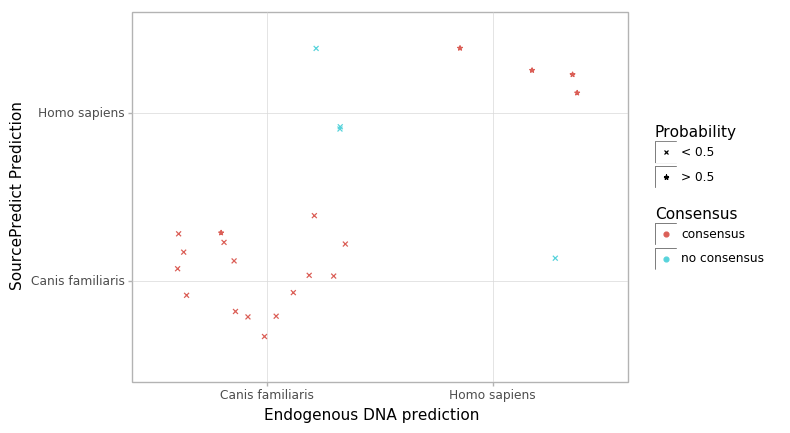

<ggplot: (8771585463770)>

In [153]:
p = ggplot(d, aes(x = 'endo_pred',y = 'sourcepredict_pred', label='sample'))  + geom_jitter(aes(color="cateregorical_consensus", shape='sup_0.5'))
p = p + theme_light() + labs(x='Endogenous DNA prediction',y = 'SourcePredict Prediction')
p = p + scale_shape_manual(name="Probability", values = {'> 0.5':'*', '< 0.5':'x'})
p = p + scale_colour_discrete(name='Consensus')
p = p + guides(color = guide_legend(override_aes={"shape":'o'}))
p.save("results/figure5.png", dpi=300)
p